#13 Long Short-Term Memory (LSTM) networks

LSTM networks stand as a powerful solution to one of the most persistent challenges in training recurrent neural networks (RNNs): the vanishing gradient problem.

In traditional RNNs, the gradients can become very small as they propagate back through time, which impedes the networks' ability to capture long-range dependencies in sequential data. LSTMs address this issue with an ingenious architectural design that includes specialized memory cells and gating mechanisms. Each LSTM cell possesses the ability to remember or forget information over extended sequences, rendering them particularly adept at modeling sequences with extended gaps between relevant information.

The core of the LSTM architecture is its three gating mechanisms: the input gate, the forget gate, and the output gate. These gates allow LSTMs to determine what information to store, what information to discard, and how to update the cell's memory state. This unique design empowers LSTMs to effectively learn and maintain long-term dependencies in sequential data, making them a preferred choice for tasks such as machine translation, speech recognition, and sentiment analysis where capturing context over extended sequences is essential.

###Exercise

Build an LSTM network to predict stock prices based on historical stock data. Show the model's ability to capture sequential dependencies.

In [13]:
import yfinance as yf
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

Data Preparation:


*   Divide the dataset into training and testing sets.
*   Normalize the data to ensure that all features are within a similar scale.



In [14]:
# Fetch historical stock data using yfinance
stock_symbol = "AAPL"
start_date = "2020-01-01"
end_date = "2023-01-01"
stock_data = yf.download(stock_symbol, start=start_date, end=end_date, progress=False)

# Extract the 'Close' prices
stock_prices = stock_data["Close"].values.reshape(-1, 1)

#normalize the data
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(stock_prices)

# Split the data into training and testing sets
train_size = int(0.8 * len(normalized_data))
train_data, test_data = normalized_data[:train_size], normalized_data[train_size:]


In [12]:
normalized_data

array([[0.15085277],
       [0.14505529],
       [0.14976075],
       [0.14696135],
       [0.15649137],
       [0.16927753],
       [0.17066729],
       [0.18383068],
       [0.17533306],
       [0.17267259],
       [0.18041574],
       [0.18734493],
       [0.1830564 ],
       [0.18529994],
       [0.18833764],
       [0.18651102],
       [0.16792745],
       [0.18528007],
       [0.19848314],
       [0.19754999],
       [0.16903929],
       [0.16735166],
       [0.18758317],
       [0.19274529],
       [0.20021045],
       [0.18992596],
       [0.19294378],
       [0.18909205],
       [0.2041615 ],
       [0.19953542],
       [0.19969428],
       [0.18788097],
       [0.19705363],
       [0.190462  ],
       [0.17606765],
       [0.14654436],
       [0.12649154],
       [0.13556496],
       [0.09758373],
       [0.09726605],
       [0.14779519],
       [0.12895351],
       [0.15559791],
       [0.13610106],
       [0.12837772],
       [0.08299089],
       [0.12105149],
       [0.101

Model Architecture:

*   Create an LSTM model architecture. The architecture should include one or more LSTM layers, followed by one or more Dense layers for regression.
*   Explain the concept of input sequences and time steps, as well as how to reshape the data to fit the LSTM input format.



In [15]:
# Define model architecture
time_steps=30 #Number of time steps in each input sequence
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(time_steps, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

Model Training:

*   Train the LSTM model using the training data. Explain the importance of setting appropriate hyperparameters, such as batch size and number of epochs.
*   Monitor the training progress by plotting loss curves and observing how the model's performance changes over epochs.



In [16]:
# Set hyperparameters
batch_size = 60
epochs = 110
time_steps = 30  # Number of time steps in each input sequence

# Reshape data to fit LSTM input format
X_train, y_train = [], []
for i in range(len(train_data) - time_steps):
    X_train.append(train_data[i:i+time_steps])
    y_train.append(train_data[i+time_steps])
X_train, y_train = np.array(X_train), np.array(y_train)

# Train the model
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, shuffle=True)


Epoch 1/110
10/10 [==============================] - 2s 19ms/step - loss: 0.2523
Epoch 2/110
10/10 [==============================] - 0s 19ms/step - loss: 0.1032
Epoch 3/110
10/10 [==============================] - 0s 19ms/step - loss: 0.0170
Epoch 4/110
10/10 [==============================] - 0s 31ms/step - loss: 0.0070
Epoch 5/110
10/10 [==============================] - 0s 29ms/step - loss: 0.0046
Epoch 6/110
10/10 [==============================] - 0s 30ms/step - loss: 0.0018
Epoch 7/110
10/10 [==============================] - 0s 33ms/step - loss: 0.0016
Epoch 8/110
10/10 [==============================] - 0s 31ms/step - loss: 0.0014
Epoch 9/110
10/10 [==============================] - 0s 31ms/step - loss: 0.0014
Epoch 10/110
10/10 [==============================] - 0s 29ms/step - loss: 0.0013
Epoch 11/110
10/10 [==============================] - 0s 30ms/step - loss: 0.0013
Epoch 12/110
10/10 [==============================] - 0s 31ms/step - loss: 0.0012
Epoch 13/110
10/10 [=====

Model Evaluation:

*   Use the trained model to make predictions on the testing data.
*   Evaluate the model's performance using appropriate metrics like Mean Squared Error (MSE) or Root Mean Squared Error (RMSE).



In [17]:
# Prepare testing data
X_test, y_test = [], []
for i in range(len(test_data) - time_steps):
    X_test.append(test_data[i:i+time_steps])
    y_test.append(test_data[i+time_steps])
X_test, y_test = np.array(X_test), np.array(y_test)

# Make predictions
predictions = model.predict(X_test)

# Calculate MSE
mse = np.mean((predictions - y_test)**2)
print("Mean Squared Error:", mse)


4/4 [==============================] - 0s 8ms/step
Mean Squared Error: 0.0009287378947941328


Visualization:

*   Plot the true stock prices and the predicted stock prices over time to visually assess the model's predictions.




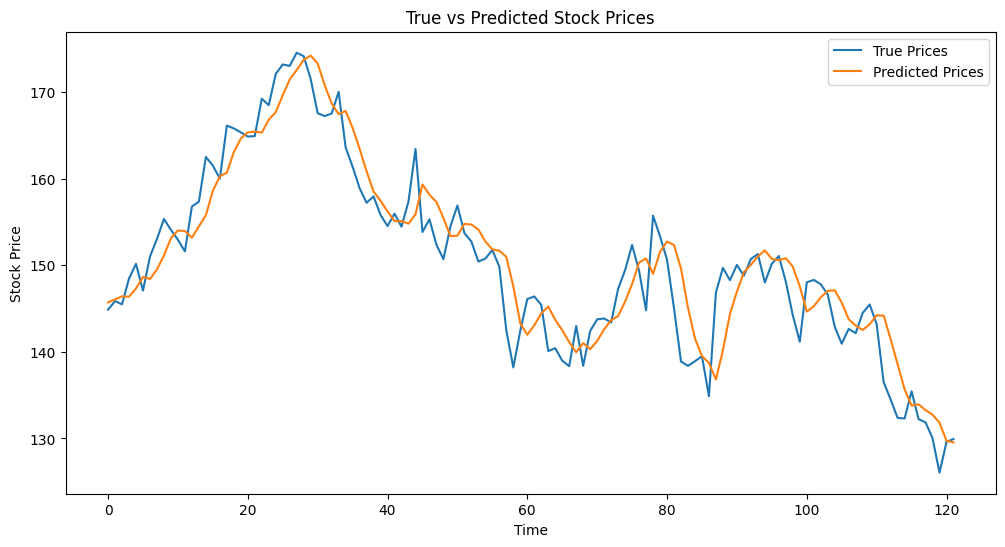

In [18]:
import matplotlib.pyplot as plt

# Inverse transform to get the original prices
predicted_prices = scaler.inverse_transform(predictions)
true_prices = scaler.inverse_transform(y_test)

# Plot true vs predicted prices
plt.figure(figsize=(12, 6))
plt.plot(true_prices, label="True Prices")
plt.plot(predicted_prices, label="Predicted Prices")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.title("True vs Predicted Stock Prices")
plt.legend()
plt.show()
